# BanditPAM (MNIST Demo)

<img src='https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png' width='250'>

In [1]:
# Start in the repository root directory, i.e. '/BanditPAM/'.
from banditpam import KMedoids
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
# Load the 1000-point subset of MNIST and calculate its t-SNE embeddings for visualization:
X = pd.read_csv('data/MNIST_1k.csv', sep=' ', header=None).to_numpy()
X_tsne = TSNE(n_components=2).fit_transform(X)

In [7]:
# Fit the data with BanditPAM:
kmed = KMedoids(n_medoids=10, algorithm="BanditPAM")
kmed.fit(X, 'L2')

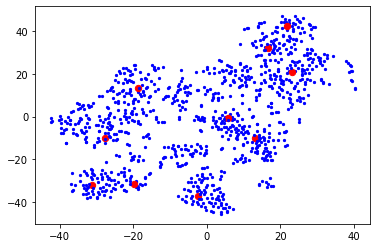

In [7]:
# Visualize the data and the medoids via t-SNE:
for p_idx, point in enumerate(X):
    if p_idx in map(int, kmed.medoids):
        plt.scatter(X_tsne[p_idx, 0], X_tsne[p_idx, 1], color='red', s = 40)
    else:
        plt.scatter(X_tsne[p_idx, 0], X_tsne[p_idx, 1], color='blue', s = 5)

plt.show()